# Random Forests (Bosques aleatorios)

Por que no utilizar un cojunto de arboles para predecir. Esta es la idea detras de Random Forest, la combinacion de multiples arboles de decision. <br>
los bosques aleatorios han ganado gran popularidad y acogida por la comunidad practicante de aprendizaje automatico debido a su buen rendimiento en tareas de clasificacion, escalabilidad y facilidad de uso. Los arboles aleatorios promedian multiples arboles de decision(profundos) que sufren indivudualmente una alta varianza, para construir un modelo mas robusto que sea menos suceptible a tener sobre ajuste y por consiguiente tenga mejor rendimiento o generalizacion.

Observaciones sobre bosques aleatorios:<br>
Es una tecnica de aprendizaje en conjunto  o ensamble learning, tecnica muy poderosa y con mucha popularidad en consursos de aprendizaje automatico.<br>
Se basa en la salida de muchos modelos individuales que combinan dichas salidas de una manera inteligente para producir un modelo de aprendizaje automatico mas fuerte y robusto.<br>
El aprendizaje en conjunto funciona mejor cuando los modelos individuales que componen el conjunto son tan diferentes entre sí como sea posible.

Ejemplo de arboles aleatorios en scikit-learn

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT5/master/data/titanic_train.csv')

In [3]:
# encode female as 0 and male as 1
titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1})

# fill in the missing values for age with the mean age
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

# create three dummy variables, drop the first dummy variable, and store the two remaining columns as a DataFrame
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked').iloc[:, 1:]

# concatenate the two dummy variable columns onto the original DataFrame
titanic = pd.concat([titanic, embarked_dummies], axis=1)

In [4]:
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']

In [5]:
X = titanic[feature_cols]

In [6]:
y = titanic.Survived

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
forest = RandomForestClassifier(n_estimators=50, random_state=1, n_jobs=1)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state =1)

In [16]:
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [17]:
from sklearn import metrics
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n")

    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y,y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y,y_pred),"\n")
        
measure_performance(x_train,y_train,forest, show_classification_report=False, show_confusion_matrix=True)

Accuracy:0.903 

Confusion matrix
[[465  31]
 [ 47 258]] 



La exactitud del modelo es bastante buena cercana al 89 %; a continuacion se presentan algunos ajustes o tuning que podemos realizar al estimador para mejorar su precision:

In [117]:
from sklearn.model_selection import cross_val_score

Tuning n_stimators

Un parámetro de ajuste importante es n_estimadores, que es el número de árboles que se deberia crecer. Debe ser un valor lo suficientemente grande como para que el error parezca haberse "estabilizado".

In [144]:
estimator_range = range(10, 310, 10)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())

c:\users\jhovanny.canas.pino\appdata\local\programs\python\python36\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
c:\users\jhovanny.canas.pino\appdata\local\programs\python\python36\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
c:\users\jhovanny.canas.pino\appdata\local\programs\python\python36\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memo

Text(0, 0.5, 'Accuracy')

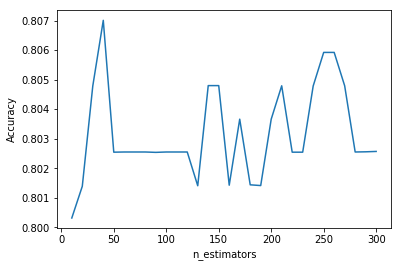

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

Tuning max_features

El otro parámetro de ajuste importante es max_features, que es el número de características que deben considerarse en cada división.

In [122]:
feature_range = range(1, len(feature_cols)+1)

# list to store the average Accuracy for each value of max_features
accuracy_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    clf = RandomForestClassifier(n_estimators=200, max_features=feature, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

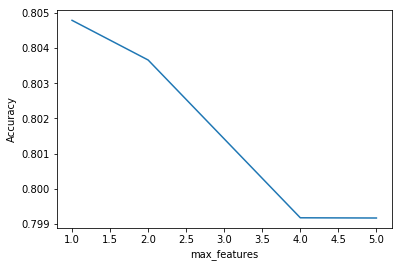

In [123]:
plt.plot(feature_range, accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy')

Entrenar el modelo de bosques aleatorios con los mejores parametros

In [135]:
forest = RandomForestClassifier(n_estimators=40, max_features=1, random_state=1, n_jobs=1)

In [136]:
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [137]:
# compute feature importances
pd.DataFrame({'feature':feature_cols, 'importance':forest.feature_importances_}).sort_values('importance')

,feature,importance
3,Embarked_Q,0.011510
4,Embarked_S,0.029554
0,Pclass,0.159486
1,Sex,0.360822
2,Age,0.438627


In [138]:
from sklearn import metrics
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n")

    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y,y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y,y_pred),"\n")
        
measure_performance(x_train,y_train,forest, show_classification_report=False, show_confusion_matrix=True)

Accuracy:0.903 

Confusion matrix
[[466  30]
 [ 48 257]] 



Comparando Bosques aleatorios vs Arboles de decision

Ventajas de los bosques aleatorios

- El rendimiento es competitivo con los mejores métodos de aprendizaje supervisado
- Proporciona una estimación más fiable de la importancia de las características

Desventajas

- Menos interpretable
- Más lento para entrenar
- Más lento de predecir